In [1]:
#更换工作路径
setwd('/public/home/lyx/00.16S/00BR/00.bamboorat/phyloseq/')
#显示路径下的所有文件
list.files()

[1] "alpha_div.rds"                      "alpha_habitat.pdf"                 
 [3] "alpha_Observed_MRM.pdf"             "alpha_pgls.pdf"                    
 [5] "alpha_Shannon_MRM.pdf"              "alpha_species.pdf"                 
 [7] "ASV_species.xls"                    "ASV_table.tsv"                     
 [9] "beta_div.rds"                       "bray_distance.xls"                 
[11] "bray_MRM.pdf"                       "bray_pcoa.pdf"                     
[13] "bray_pgls.pdf"                      "dna-sequences.fasta"               
[15] "Enterotypes_bamboo.pdf"             "filtered-table.tsv"                
[17] "genus_lefse_Bathyergidae.pdf"       "genus_lefse_habitat.pdf"           
[19] "genus_lefse_Spalacidae.pdf"         "host_tree_exp_dist.RDS"            
[21] "host_tree_exp.nwk"                  "host_tree.nwk"                     
[23] "host_tree.pdf"                      "host_tree.png"                     
[25] "init.R"                             "metadata.txt"                      
[27] "otu_genus.xls"                      "otu_phylum.xls"                    
[29] "OTU_species.xls"                    "phyloseq_phylum_itol-phylumbar.txt"
[31] "phyloseq.rds"                       "physeq_diet-itol.txt"              
[33] "physeq_gut-itol.txt"                "physeq_life_style-itol.txt"        
[35] "physeq_sample_type-itol.txt"        "rarefied_ASV.xls"                  
[37] "rep.fa"                             "rep.xls"                           
[39] "rooted_tree.nwk"                    "taxa.xls"                          
[41] "taxonomy.tsv"                       "upgma_bray_species.pdf"

In [2]:
####import packages####
library(phyloseq)
library(tidyr)
library(dplyr)
library(ape)
library(ggplot2)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where




In [3]:
####phyloseq####
otu <- read.delim2("ASV_table.tsv",header=T,
                       sep="\t",check.names = F,row.names = 1) %>%as.matrix()
tax <- read.delim("taxa.xls",header=T,row.names = 1,
                      sep="\t",check.names = F) %>% as.matrix()
samples <- read.table("metadata.txt",header = T,
                         sep="\t",check.names = F,row.names = 1)
tree <- read.tree("rooted_tree.nwk")

OTU = otu_table(otu,taxa_are_rows =T)
TAX = tax_table(tax)
samples = sample_data(samples)

phyloseq <- phyloseq(OTU,TAX,samples,tree)
phyloseq
sample_sums(phyloseq)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5722 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 5722 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5722 tips and 5721 internal nodes ]

BMR1   BMR2   BMR3   BMR4   BMR5   BMR6   CBR1  CBR10   CBR2   CBR3   CBR4 
 23328  13095  11853  17567  26984  13120  11559  30428  66500  57817  36844 
  CBR5   CBR6   CBR7   CBR8   CBR9    CN1    CN2    CN3    CN4    CN5    CN6 
 58129  64629  64977  37228  37829  66087  63245  61768  55489  61544  67583 
  CWR1   CWR2   CWR3   CWR4   CWR5   CWR6   DMR1   DMR2   DMR3   DMR4   DMR5 
 64942  48609  65150  67843  70512  59448  77932  62606  76161  58531  56610 
  DMR6    EL1    EL2    EL3    GZ1    GZ2    GZ3    GZ4    GZ5    GZ6   NMR1 
 46495  48736  56996  63257  35905  42948  36362  37054  38293  39135  15646 
  NMR2   NMR3   NMR4   NMR5   NMR6    PC1    PC2    PC3    PC4    PC5    PC6 
 14336  14897  14981  15779  15349 218516  90323  99873 139123 118874 100060 
   PC7    PM1    PM2  SCFM1  SCFM2  SCFM3  SCFM4  SCFM5  SCFM6    SM1    SM2 
 59512  60910  89797  68764  71190  54795  59272  45966  68372  47280  49984 
   SM3    SM4    SM5    SM6    SR1    SR2    SR3    SR4    SR5    SR6   WHM1 
 46931  40028  54674  43636 251124  75912  61109  68173  62696  88536  81835 
  WHM2   WHM3   WHM4 
113524  95480  91922

In [4]:
####rarefy####
set.seed(1)
phyloseq<-rarefy_even_depth(phyloseq, rngseed=1,
                               sample.size=min(sample_sums(phyloseq)),replace=F)
phyloseq
sample_sums(phyloseq)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

864OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4858 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 4858 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4858 tips and 4857 internal nodes ]

BMR1  BMR2  BMR3  BMR4  BMR5  BMR6  CBR1 CBR10  CBR2  CBR3  CBR4  CBR5  CBR6 
11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 
 CBR7  CBR8  CBR9   CN1   CN2   CN3   CN4   CN5   CN6  CWR1  CWR2  CWR3  CWR4 
11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 
 CWR5  CWR6  DMR1  DMR2  DMR3  DMR4  DMR5  DMR6   EL1   EL2   EL3   GZ1   GZ2 
11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 
  GZ3   GZ4   GZ5   GZ6  NMR1  NMR2  NMR3  NMR4  NMR5  NMR6   PC1   PC2   PC3 
11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 
  PC4   PC5   PC6   PC7   PM1   PM2 SCFM1 SCFM2 SCFM3 SCFM4 SCFM5 SCFM6   SM1 
11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 
  SM2   SM3   SM4   SM5   SM6   SR1   SR2   SR3   SR4   SR5   SR6  WHM1  WHM2 
11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 11559 
 WHM3  WHM4 
11559 11559

In [5]:
otu = phyloseq %>% 
    otu_table %>% 
    as.matrix  %>% 
    as.data.frame
write.table(otu,"rarefied_ASV.xls",sep = "\t",quote=F)

In [6]:
####import metadata####
metadata = phyloseq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame 
metadata %>% nrow %>% print
#columns in metadata table
metadata %>% colnames
summary(metadata)

[1] 80


[1] "Sampleid"        "Group"           "Class"           "Order"          
 [5] "Family"          "Genus"           "Species"         "Sample_type"    
 [9] "Captive_Wild"    "Domestic_Wild"   "Habitat"         "Diet"           
[13] "Diet_detail"     "Digestive_tract" "Digest_detail"

   Sampleid            Group              Class              Order          
 Length:80          Length:80          Length:80          Length:80         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    Family             Genus             Species          Sample_type       
 Length:80          Length:80          Length:80          Length:80         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Captive_Wild       Domestic_Wild        Habitat              Diet          
 Length:80          Length:80          Length:80          Length:80         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Diet_detail        Digestive_tract    Digest_detail     
 Length:80        

In [7]:
####import host tree####
host_tree <- read.tree("host_tree.nwk")
host_tree


Phylogenetic tree with 14 tips and 13 internal nodes.

Tip labels:
  Sorex_araneus, Scaptochirus_moschatus, Niviventer_confucianus, Niviventer_fulvescens, Leopoldamys_edwardsi, Mus_musculus, ...
Node labels:
  , '14', '49', '43', '36', '25', ...

Rooted; includes branch lengths.

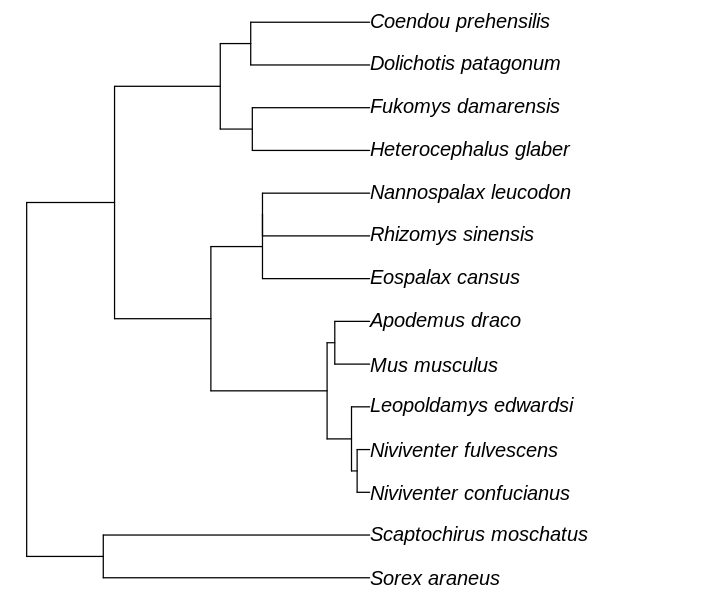

In [8]:
#plot host tree
options(repr.plot.width=6, repr.plot.height=5)
plot(host_tree, no.margin=TRUE, cex=1)

In [ ]:
#显示节点
# library(ggtree)
# data=fortify(host_tree)
# p <- ggtree(host_tree) + 
#     geom_nodepoint(color="black", alpha = 1, size = 2) +
#     geom_tiplab(size=3, color="black") +
#     xlim_tree(max(data$x)*1.4)
# p
# ggsave("host_tree.pdf",dpi = 1000)

In [9]:
####add all samples####
#tip label <--> node id
df_nodes = data.frame(label = host_tree$tip.label,
                      node = 1:length(host_tree$tip.label))
# df_nodes

#adding all host_subj_id
df_nodes = df_nodes %>%
    inner_join(metadata %>% dplyr::select(Sampleid,Species)%>%
               mutate(Species = gsub(' ', '_', Species)),
               c('label'='Species')) %>%
    as.data.frame

# df_nodes

In [10]:
####plot all samples####
#adding new tips
host_tree_exp = host_tree

for(lab in unique(df_nodes$label)){
    #creating polytomy tree
    samps = df_nodes[df_nodes$label == lab,]
    x = paste(samps$Sampleid, collapse=',')
    x = paste0('(', x, ');')
    tree_poly = read.tree(text = x)
    #adding branch lengths 
    tree_poly = compute.brlen(tree_poly, 1e-10)
    
    #getting current node --> label structure
    df_tmp = data.frame(label = host_tree_exp$tip.label,
                        node = 1:length(host_tree_exp$tip.label))
    
    #getting node corresponding to tip label 
    x = 1:length(host_tree_exp$tip.label)
    node = x[which(host_tree_exp$tip.label==lab)] 

    #adding subtree to main tree
    host_tree_exp = bind.tree(host_tree_exp, tree_poly, where=node)
}

host_tree_exp


Phylogenetic tree with 80 tips and 27 internal nodes.

Tip labels:
  SR1, SR2, SR3, SR4, SR5, SR6, ...
Node labels:
  , '14', NA, NA, '49', '43', ...

Rooted; includes branch lengths.

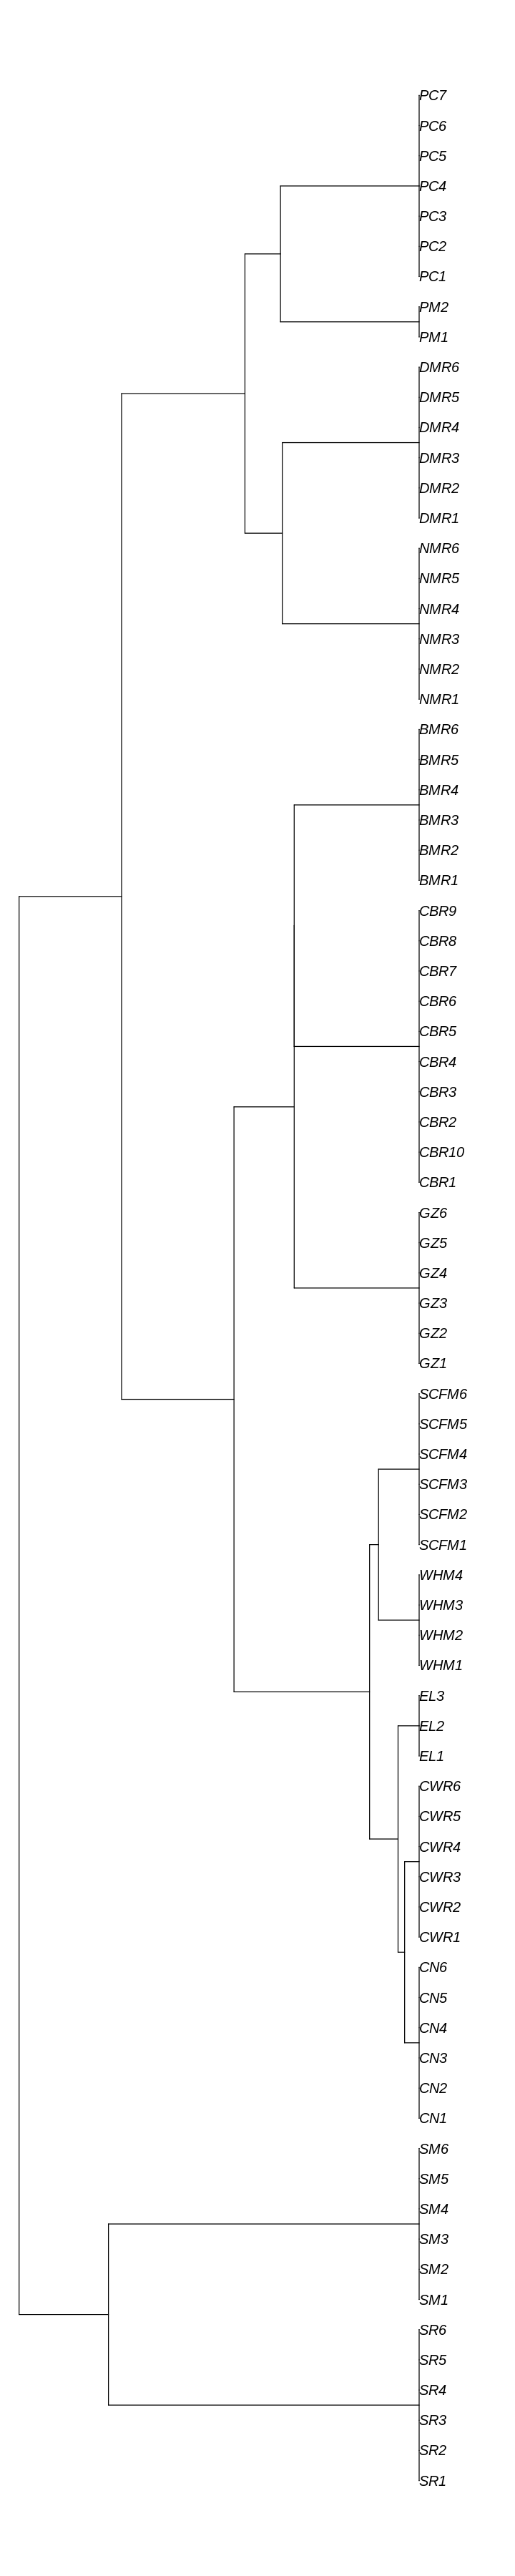

In [11]:
#plotting tree
options(repr.plot.width=6, repr.plot.height=30)
plot(host_tree_exp, no.margin=TRUE, cex=1)

#save nwk
write.tree(host_tree_exp,"host_tree_exp.nwk")
# ggsave("host_tree_exp.pdf",dpi = 1000)

In [12]:
####saving phyloseq####
saveRDS(phyloseq, file="phyloseq.rds")

In [13]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /public/home/lyx/anaconda3/envs/r4.1/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] stringr_1.5.1   ggplot2_3.4.4   ape_5.7-1       dplyr_1.1.4    
[5] tidyr_1.3.0     phyloseq_1.39.1 jsonlite_1.8.7 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.11            lattice_0.22-5         Biostrings_2.62.0     
 [4] digest_0.6.33          foreach_1.5.2          utf8_1.2.4 